In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import requests

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('data/vcdb.csv')
concatenated = pd.read_csv('data/PRC_USBP.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,52,126,127,128,189,218,252,306,580,618,899,901,902,1394,1457,1472,1473,1474,1479,1708,1727,1728,1781,1782,1920,1923,1933,1945,1970,1982,2264,2266,2440,2505) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


timeline.incident.year
1971       1
1984       2
1994       1
1995       1
1998       1
1999       2
2000       1
2001       5
2002       6
2003      13
2004      17
2005      23
2006      23
2007      51
2008      82
2009      94
2010     588
2011     546
2012    1274
2013    1938
2014    1011
2015     920
2016     839
2017     584
2018     329
2019     274
2020     166
dtype: int64
[1971 1984 1994 1995 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


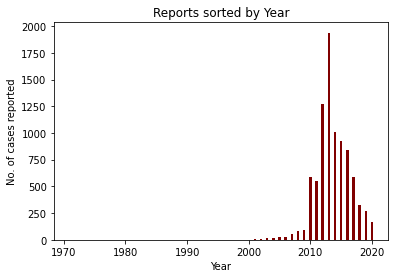

In [3]:
data = df.groupby(["timeline.incident.year"]).size()
print(data)
xaxis= df["timeline.incident.year"].unique()
xaxis.sort()
print(xaxis)
#df.plot(x=xaxis,y=data, kind = 'bar')
plt.bar(xaxis,data,color ='maroon',width = 0.4)
plt.xlabel("Year")
plt.ylabel("No. of cases reported")
plt.title("Reports sorted by Year")
plt.show()

In [4]:
print(df.size)
#df.dropna(subset=["impact.overall_amount"],inplace=True)
#malware2 = df['action.malware.name'].dropna()
#rint(len(malware2))
  #Remove rows with exact same values#
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique==1].index
df.drop(cols_to_drop,axis=1,inplace=True)
print(df.size)



22199800
10444896


In [5]:
#convert currency
df.reset_index(inplace=True,drop=True)

In [6]:
currency = ['impact.iso_currency_code.AUD', 'impact.iso_currency_code.CAD', 'impact.iso_currency_code.CZK', 'impact.iso_currency_code.EUR', 'impact.iso_currency_code.GBP', 'impact.iso_currency_code.INR', 'impact.iso_currency_code.KRW', 'impact.iso_currency_code.SGD', 'impact.iso_currency_code.THB', 'impact.iso_currency_code.USD', 'impact.iso_currency_code.ZAR', 'impact.notes', 'impact.overall_amount', 'impact.overall_rating.Catastrophic', 'impact.overall_rating.Damaging', 'impact.overall_rating.Distracting', 'impact.overall_rating.Insignificant', 'impact.overall_rating.Painful', 'impact.overall_rating.Unknown']
#df[currency]

Currency Conversion code based on google rates

In [7]:
for index, row in df.iterrows():
  if row['impact.iso_currency_code.AUD'] is True: #Aussie
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 0.77
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.CAD'] is True: #Canada
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 0.78
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.CZK'] is True: #Czech
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 0.046
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.EUR'] is True: #Euro
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 1.22
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.GBP'] is True: #poundsterling
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 1.35
    df.loc[index,'impact.overall_amount'] = converted_currency    

  if row['impact.iso_currency_code.INR'] is True: #indian rupee
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 0.014
    df.loc[index,'impact.overall_amount'] = converted_currency 

  if row['impact.iso_currency_code.KRW'] is True: #koreawon
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 0.00091
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.SGD'] is True:
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 0.75
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.THB'] is True: #thaibaht
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 0.033
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.ZAR'] is True: #south africa rand
    #print(type(row['impact.overall_amount']))
    #print(row['impact.overall_amount'])
    converted_currency = row['impact.overall_amount'] * 0.065
    df.loc[index,'impact.overall_amount'] = converted_currency



    
    


In [8]:
for index, row in df.iterrows():
  if row['impact.iso_currency_code.AUD'] is True: #Aussie
    converted_currency = row['impact.overall_amount'] * 0.77
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.CAD'] is True: #Canada
    converted_currency = row['impact.overall_amount'] * 0.78
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.CZK'] is True: #Czech
    converted_currency = row['impact.overall_amount'] * 0.046
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.EUR'] is True: #Euro
    
    converted_currency = row['impact.overall_amount'] * 1.22
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.GBP'] is True: #poundsterling
    
    converted_currency = row['impact.overall_amount'] * 1.35
    df.loc[index,'impact.overall_amount'] = converted_currency    

  if row['impact.iso_currency_code.INR'] is True: #indian rupee
    converted_currency = row['impact.overall_amount'] * 0.014
    df.loc[index,'impact.overall_amount'] = converted_currency 

  if row['impact.iso_currency_code.KRW'] is True: #koreawon
    converted_currency = row['impact.overall_amount'] * 0.00091
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.SGD'] is True:
    converted_currency = row['impact.overall_amount'] * 0.75
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.THB'] is True: #thaibaht
    converted_currency = row['impact.overall_amount'] * 0.033
    df.loc[index,'impact.overall_amount'] = converted_currency

  if row['impact.iso_currency_code.ZAR'] is True: #south africa rand
    converted_currency = row['impact.overall_amount'] * 0.065
    df.loc[index,'impact.overall_amount'] = converted_currency



    
    


In [9]:
for index, row in df.iterrows():
  if row['impact.iso_currency_code.SGD'] is True:
    print(type(row['impact.overall_amount']))
    print(row['impact.overall_amount'])


<class 'float'>
2250.0


In [10]:
for index, row in df.iterrows():
    if row['victim.employee_count.1 to 10'] is True: 
      employee_count = 10 
      df.loc[index,'new_employee_count'] = employee_count

    if row['victim.employee_count.11 to 100'] is True: 
      employee_count = 50
      df.loc[index,'new_employee_count'] = employee_count
      
    if row['victim.employee_count.101 to 1000'] is True: 
      employee_count = 5000
      df.loc[index,'new_employee_count'] = employee_count
      
    if row['victim.employee_count.10001 to 25000'] is True: 
      employee_count = 17500
      df.loc[index,'new_employee_count'] = employee_count
      
    if row['victim.employee_count.25001 to 50000'] is True: 
      employee_count = 37500
      df.loc[index,'new_employee_count'] = employee_count

    if row['victim.employee_count.50001 to 100000'] is True: 
      employee_count = 75000
      df.loc[index,'new_employee_count'] = employee_count

    if row['victim.employee_count.Over 100000'] is True: 
      employee_count = 100000
      df.loc[index,'new_employee_count'] = employee_count
      

In [11]:
for index, row in df.iterrows():
    if row['action.Hacking'] is True: 
      df.loc[index,'attack_type'] = 'Hacking'
      df.loc[index,'attack_type_no'] = '1'
    if row['action.Malware'] is True: 
      df.loc[index,'attack_type'] = 'Malware'
      df.loc[index,'attack_type_no'] = '2'
    if row['action.Social'] is True: 
      df.loc[index,'attack_type'] = 'Social'
      df.loc[index,'attack_type_no'] = '3'
    if row['action.Physical'] is True: 
      df.loc[index,'attack_type'] = 'Physical'
      df.loc[index,'attack_type_no'] = '4'
    if row['action.Misuse'] is True: 
      df.loc[index,'attack_type'] = 'Misuse'
      df.loc[index,'attack_type_no'] = '5'
    if row['action.Error'] is True: 
      df.loc[index,'attack_type'] = 'Error'
      df.loc[index,'attack_type_no'] = '6'
    if row['action.Unknown'] is True: 
      df.loc[index,'attack_type'] = 'Unknown'
      df.loc[index,'attack_type_no'] = '7'
      #action.Malware', 'action.Hacking', 'action.Social', 'action.Physical', 'action.Misuse', 'action.Error

In [12]:
#df['new_employee_count'] = df['new_employee_count'].replace(np.nan, 50)
df['timeline.incident.month'] = df["timeline.incident.month"].replace(np.nan, 1)

In [13]:
df = df.drop(df.loc[df['victim.industry'] == '48-49'].index)
#df = df.drop(df.index[[6571]])

In [14]:
df.reset_index(inplace=True,drop=True)

victim.employee_count.1 to 10 	victim.employee_count.10001 to 25000 	victim.employee_count.1001 to 10000 	victim.employee_count.101 to 1000 	victim.employee_count.11 to 100 	victim.employee_count.25001 to 50000 	victim.employee_count.50001 to 100000 	victim.employee_count.Large 	victim.employee_count.Over 100000

In [15]:
df2 = pd.DataFrame()
df2['Victim_Name'] = df["victim.victim_id"].values
df2['Industry'] = df["victim.industry.name"].values
#maynot need naics
df2['NAICS'] = df['victim.industry'].values
df2['Incident_Id'] = df["incident_id"].values
df2['Attack_Type'] = df['attack_type'].values
df2['Attack_Type_No'] = df['attack_type_no'].values

df2['Year_of_Attack'] = df["timeline.incident.year"].values
df2['Month_of_Attack'] = df["timeline.incident.month"].values
df2['Impact_Amount'] = df["impact.overall_amount"].values
df2['Currency'] = "USD"
df2['Employee_Count'] = df["new_employee_count"].values
df2['Summary'] = df["summary"].values



#df2

In [16]:
df2['Industry'].unique()

array(['Public ', 'Healthcare ', 'Information ', 'Utilities ',
       'Other Services ', 'Finance ', 'Educational ', 'Retail ',
       'Manufacturing ', 'Accomodation ', 'Transportation ',
       'Construction ', 'Professional ', 'Administrative ', 'Unknown',
       'Trade ', 'Entertainment ', 'Real Estate ', 'Management ',
       'Mining ', 'Agriculture '], dtype=object)

Combining the repositories

In [17]:
df3 = pd.concat([df2,concatenated]).reset_index(drop=True)
df3 = df3.drop(['Unnamed: 0'],axis=1)
df3['Attack_Type'] = df3['Attack_Type'].replace(np.nan, 'Unknown')
#df3

In [18]:
for index, row in df3.iterrows():
    if row['Attack_Type'] == 'Hacking': 
        df3.loc[index,'Attack_Type_No'] = '1'
    if row['Attack_Type'] == 'Malware': 
        df3.loc[index,'Attack_Type_No'] = '2'
    if row['Attack_Type'] == 'Social': 
        df3.loc[index,'Attack_Type_No'] = '3'
    if row['Attack_Type'] == 'Physical': 
        df3.loc[index,'Attack_Type_No'] = '4'
    if row['Attack_Type'] == 'Misuse': 
        df3.loc[index,'Attack_Type_No'] = '5'
    if row['Attack_Type'] == 'Error': 
        df3.loc[index,'Attack_Type_No'] = '6'  
    if row['Attack_Type'] == 'Unknown': 
        df3.loc[index,'Attack_Type_No'] = '7'  
        #if row['Attack_Type'] == 'Hacking':
            #df3.loc[index,'Attack_Type_No'] = '1'
df3['Currency'] = "USD"
#df3['Attack_Type'] = df3['Attack_Type'].replace(np.nan, 'Unknown')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:

labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
df3['Industry_No'] = labelencoder.fit_transform(df3['Industry'])
#df3['Attack_Type_No']= labelencoder.fit_transform(df3['Attack_Type'].str)
#df3

In [21]:
df3.to_csv('data/final_repo.csv')

Analysis



Attack_Type
Error       5696
Hacking     3988
Malware      464
Misuse      1769
Physical    2887
Social      1109
Unknown     1095
dtype: int64


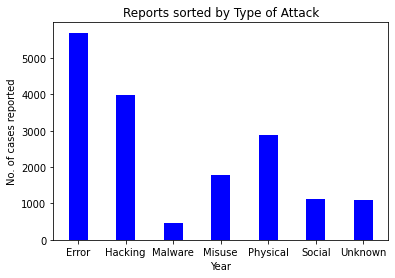

In [22]:
data = df3.groupby(["Attack_Type"]).size()
print(data)
xaxis= ['Error','Hacking','Malware', 'Misuse', 'Physical', 'Social', 'Unknown']
plt.bar(xaxis,data,color ='blue',width = 0.4)
plt.xlabel("Year")
plt.ylabel("No. of cases reported")
plt.title("Reports sorted by Type of Attack")
plt.show()

In [23]:
print(df3.loc[df3['Attack_Type'] == 'Error'].groupby(["Industry"]).size())

Industry
Accomodation         17
Administrative       32
Construction          3
Educational         565
Entertainment        18
Finance             506
Healthcare         2151
Information         133
Management            2
Manufacturing        27
Mining                4
Other Services      307
Professional         79
Public             1558
Real Estate          10
Retail              210
Trade                10
Transportation       23
Unknown              34
Utilities             7
dtype: int64


In [24]:
print(df3.loc[df3['Attack_Type'] == 'Hacking'].groupby(["Industry"]).size())

Industry
Accomodation        26
Administrative      47
Agriculture          2
Construction         4
Educational        422
Entertainment       25
Finance            347
Healthcare         810
Information        402
Management           4
Manufacturing       58
Mining               2
Other Services     702
Professional       123
Public             479
Real Estate          7
Retail             392
Trade               27
Transportation      17
Unknown             81
Utilities           11
dtype: int64


In [25]:
print(df3.loc[df3['Attack_Type'] == 'Physical'].groupby(["Industry"]).size())

Industry
Accomodation         19
Administrative       21
Agriculture           1
Construction          5
Educational         132
Entertainment        11
Finance             291
Healthcare         1680
Information          13
Management            5
Manufacturing        24
Mining                5
Other Services       85
Professional         31
Public              277
Real Estate           6
Retail              220
Trade                13
Transportation       15
Unknown              32
Utilities             1
dtype: int64


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
#analysis = pd.DataFrame()
analysis = df3.copy()
analysis.dropna(subset=["Impact_Amount",'Employee_Count'],inplace=True)
analysis.reset_index(inplace=True,drop=True)
#analysis.reset_index(inplace=True,drop=True)
#print(analysis)

In [28]:
#X = analysis.drop(["Impact_Amount",'Victim_Name','Industry','NAICS','Incident_Id','Currency','Summary','Attack_Type','Total_Records'], axis=1)
#y = analysis["Impact_Amount"]

from sklearn.preprocessing import StandardScaler
scaled_features = analysis.copy()
scaler = StandardScaler()
col_names = ['Year_of_Attack', 'Month_of_Attack','Employee_Count','Total_Records','Impact_Amount'] #
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
#print(scaled_features)
#train_scaled = scaler.fit_transform(X_train)
#test_scaled = scaler.transform(X_test)


X = scaled_features.drop(["Impact_Amount",'Victim_Name','Industry','NAICS','Incident_Id','Currency','Summary','Attack_Type','Total_Records'], axis=1)
y = scaled_features["Impact_Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
#print(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [29]:
scaled_features

,Victim_Name,Industry,NAICS,Incident_Id,Attack_Type,Attack_Type_No,Year_of_Attack,Month_of_Attack,Impact_Amount,Currency,Employee_Count,Summary,Total_Records,Industry_No
0,Uber,Transportation,485300,4d331ca0-0b73-11e8-827c-bba53cbad290,Hacking,1,1.023958,1.445910,-0.235015,USD,-0.211475,Hackers stole the personal data of 57 million ...,NaN,18
1,Experian Plc,Administrative,561450,02CC4603-43FF-4632-8D25-E5F00976A99C,Hacking,1,0.622003,1.177859,-0.000602,USD,-0.211475,Millions of T-Mobile customers exposed in Expe...,NaN,1
2,American Tooling Center,Manufacturing,333514,f1dfe4a0-9047-11e8-8b32-9bc4732308c2,Social,3,0.622003,-0.430447,-0.226369,USD,-0.693224,a federal appeals court has sided with a comme...,NaN,10
3,"Complete P.T., Pool & Land Physical Therapy, Inc.",Healthcare,621340,7CBA77E1-4684-4F2E-9C2F-AFF06E479DD6,Misuse,5,-0.583861,0.909808,-0.235899,USD,-0.693224,Org disclosed PII on website in testimonials p...,NaN,7
4,United States Department of Veteran's Affairs,Public,923140,6FCB3A78-A870-46D6-8B96-90E6E31C1BCD,Misuse,5,0.622003,-0.966549,-0.235966,USD,2.066137,Ex-Employee Of U.S. Department Of Veteran's Af...,NaN,14
5,NatWest,Finance,522110,F1738847-66E8-4A29-AFB8-E19D0B445B30,Misuse,5,-0.181907,-0.966549,-0.235277,USD,-0.211475,court has heard that the cash was taken in 250...,NaN,6
6,Carroll County Sheriffs Office,Public,92,4bf65320-899b-11e7-bf1d-81579668407a,Social,3,1.023958,1.982012,-0.236165,USD,-0.693224,Carroll County pays ransomware demand - Carrol...,NaN,14
7,Gattison & Associates,Professional,541213,6876AF13-A15C-4053-ACE0-F50F68EE14AA,Misuse,5,-0.985816,-0.966549,-0.231256,USD,-0.694328,tax preparers identity theft,NaN,13
8,Nationwide Building Society,Finance,522292,138A8E69-1162-4393-B924-BD5E22164F17,Physical,4,-2.593636,-0.966549,-0.215154,USD,-0.211475,The Nationwide Building Society has been fined...,NaN,6
9,Cumberland Farms,Retail,447110,929834E0-5BA6-4B7E-A742-FCB5DD48260A,Physical,4,1.023958,-0.430447,-0.235486,USD,-0.693224,gas pump and ATM skimmers,NaN,16


In [30]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#train_scaled = scaler.fit_transform(X_train)
#test_scaled = scaler.transform(X_test)
#print(train_scaled)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from math import sqrt
from sklearn.metrics import mean_squared_error 
rmse_val = [] #to store rmse values for different k
r_val = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(algorithm='auto',n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    r_val.append(model.score(X_test, y_test, sample_weight=None))
    #print(model.score(X_train, y_train, sample_weight=None))
    print('RMSE value for k= ' , K , 'is:', error,'R2 is',model.score(X_test, y_test, sample_weight=None))

RMSE value for k=  1 is: 0.6252214885916622 R2 is 0.07692844743560434
RMSE value for k=  2 is: 0.6414530234025942 R2 is 0.02837811655919742
RMSE value for k=  3 is: 0.6581412670681591 R2 is -0.022835565584294452
RMSE value for k=  4 is: 0.6904976977694529 R2 is -0.12587984477532554
RMSE value for k=  5 is: 0.6897767976690554 R2 is -0.12353016800152682
RMSE value for k=  6 is: 0.791814847132955 R2 is -0.48052197005480984
RMSE value for k=  7 is: 0.7733993243609244 R2 is -0.41245672725676935
RMSE value for k=  8 is: 0.7456259454443459 R2 is -0.3128333425660803
RMSE value for k=  9 is: 0.7296731339165949 R2 is -0.25725765038102266
RMSE value for k=  10 is: 0.7184844317704245 R2 is -0.21899605233621422
RMSE value for k=  11 is: 0.6649415256802146 R2 is -0.0440817049122486
RMSE value for k=  12 is: 0.6601090252515467 R2 is -0.028961004005070737
RMSE value for k=  13 is: 0.6569195674985211 R2 is -0.01904173582087121
RMSE value for k=  14 is: 0.6547470539780231 R2 is -0.01231268931683216
RMSE

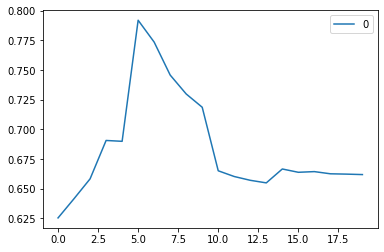

In [32]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

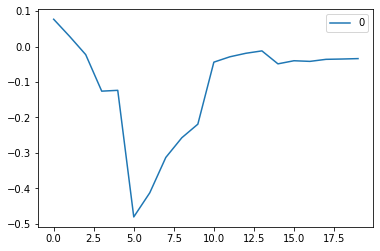

In [33]:
curve1 = pd.DataFrame(r_val) #elbow curve 
curve1.plot()

In [34]:
rmse_val2 = [] #to store rmse values for different k
r_val2 = []
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(algorithm='auto',n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_train) #make prediction on test set
    error = sqrt(mean_squared_error(y_train,pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    r_val2.append(model.score(X_train, y_train, sample_weight=None))
    #print(model.score(X_train, y_train, sample_weight=None))
    print('RMSE value for k= ' , K , 'is:', error,'R2 is',model.score(X_train, y_train, sample_weight=None))

RMSE value for k=  1 is: 7.417301638305822e-05 R2 is 0.9999999952067063
RMSE value for k=  2 is: 0.7353106686508565 R2 is 0.5289316850935493
RMSE value for k=  3 is: 0.8337110606127572 R2 is 0.3944175431296665
RMSE value for k=  4 is: 0.9082691287647067 R2 is 0.28126090984936536
RMSE value for k=  5 is: 0.9299367093123522 R2 is 0.2465595319380236
RMSE value for k=  6 is: 0.9325706187899717 R2 is 0.2422854682001765
RMSE value for k=  7 is: 0.9706127830415032 R2 is 0.17920600091515237
RMSE value for k=  8 is: 0.9877928928462067 R2 is 0.14989229317519426
RMSE value for k=  9 is: 0.9918667032359749 R2 is 0.14286588313888737
RMSE value for k=  10 is: 0.9995034054965992 R2 is 0.12961636751005035
RMSE value for k=  11 is: 1.0064266510263786 R2 is 0.11751686040417297
RMSE value for k=  12 is: 1.011836602686534 R2 is 0.1080039510856935
RMSE value for k=  13 is: 1.0171976798779199 R2 is 0.09852667342461763
RMSE value for k=  14 is: 1.0203751435033752 R2 is 0.09288593596866201
RMSE value for k=  

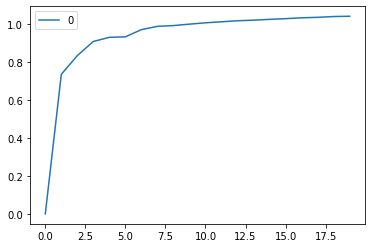

In [35]:
curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot()

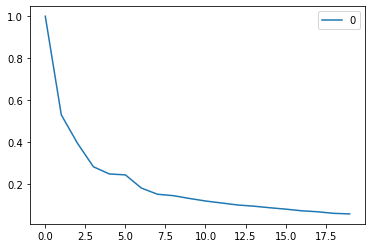

In [36]:
curve1 = pd.DataFrame(r_val2) #elbow curve 
curve1.plot()

In [37]:
scaled_features

,Victim_Name,Industry,NAICS,Incident_Id,Attack_Type,Attack_Type_No,Year_of_Attack,Month_of_Attack,Impact_Amount,Currency,Employee_Count,Summary,Total_Records,Industry_No
0,Uber,Transportation,485300,4d331ca0-0b73-11e8-827c-bba53cbad290,Hacking,1,1.023958,1.445910,-0.235015,USD,-0.211475,Hackers stole the personal data of 57 million ...,NaN,18
1,Experian Plc,Administrative,561450,02CC4603-43FF-4632-8D25-E5F00976A99C,Hacking,1,0.622003,1.177859,-0.000602,USD,-0.211475,Millions of T-Mobile customers exposed in Expe...,NaN,1
2,American Tooling Center,Manufacturing,333514,f1dfe4a0-9047-11e8-8b32-9bc4732308c2,Social,3,0.622003,-0.430447,-0.226369,USD,-0.693224,a federal appeals court has sided with a comme...,NaN,10
3,"Complete P.T., Pool & Land Physical Therapy, Inc.",Healthcare,621340,7CBA77E1-4684-4F2E-9C2F-AFF06E479DD6,Misuse,5,-0.583861,0.909808,-0.235899,USD,-0.693224,Org disclosed PII on website in testimonials p...,NaN,7
4,United States Department of Veteran's Affairs,Public,923140,6FCB3A78-A870-46D6-8B96-90E6E31C1BCD,Misuse,5,0.622003,-0.966549,-0.235966,USD,2.066137,Ex-Employee Of U.S. Department Of Veteran's Af...,NaN,14
5,NatWest,Finance,522110,F1738847-66E8-4A29-AFB8-E19D0B445B30,Misuse,5,-0.181907,-0.966549,-0.235277,USD,-0.211475,court has heard that the cash was taken in 250...,NaN,6
6,Carroll County Sheriffs Office,Public,92,4bf65320-899b-11e7-bf1d-81579668407a,Social,3,1.023958,1.982012,-0.236165,USD,-0.693224,Carroll County pays ransomware demand - Carrol...,NaN,14
7,Gattison & Associates,Professional,541213,6876AF13-A15C-4053-ACE0-F50F68EE14AA,Misuse,5,-0.985816,-0.966549,-0.231256,USD,-0.694328,tax preparers identity theft,NaN,13
8,Nationwide Building Society,Finance,522292,138A8E69-1162-4393-B924-BD5E22164F17,Physical,4,-2.593636,-0.966549,-0.215154,USD,-0.211475,The Nationwide Building Society has been fined...,NaN,6
9,Cumberland Farms,Retail,447110,929834E0-5BA6-4B7E-A742-FCB5DD48260A,Physical,4,1.023958,-0.430447,-0.235486,USD,-0.693224,gas pump and ATM skimmers,NaN,16


In [38]:
#Change of features
#X_1 = df2.drop(['incident_id','Victim_Name','Industry','Currency','summary','attack_type','attack_type_no'], axis=1)
X_1 = scaled_features.drop(['Employee_Count','Year_of_Attack',  'Month_of_Attack','Impact_Amount'  ,'Incident_Id','Victim_Name','Industry','NAICS','Incident_Id','Currency','Summary','Attack_Type','Attack_Type_No','Total_Records'], axis=1)
y_1 = scaled_features["Attack_Type_No"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
print(X_1)

     Industry_No
0             18
1              1
2             10
3              7
4             14
5              6
6             14
7             13
8              6
9             16
10            16
11            10
12             0
13             6
14            16
15             8
16             7
17             3
18            16
19            12
20            14
21             6
22             1
23             5
24             7
25             6
26            14
27             8
28             6
29            15
30             2
31             4
32            18
33            14
34            14
35             6
36             6
37            16
38             4
39             3
40             7
41            16
42             6
43             8
44            13
45            14
46             4
47             4
48            14
49             6
50            12
51             6
52            14
53             7
54            14
55             6
56             1
57            

In [39]:

#Industry_No
from sklearn.metrics import accuracy_score
for i in range(5):
  model1 = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=200000,solver='adam',)
  model1.fit(X1_train, y1_train)
  print(accuracy_score(y1_test, model1.predict(X1_test)))
#accuracy_score(y1_train, model1.predict(X1_train))

0.39285714285714285
0.35714285714285715
0.39285714285714285
0.39285714285714285
0.39285714285714285


In [40]:
#Industry_No + Month_of_Attack
X_1 = scaled_features.drop(['Year_of_Attack',  'Employee_Count','Impact_Amount'  ,'Incident_Id','Victim_Name','Industry','NAICS','Incident_Id','Currency','Summary','Attack_Type','Attack_Type_No','Total_Records'], axis=1)
y_1 = scaled_features["Attack_Type_No"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
#print(X_1)
for i in range(5):
  model1 = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=200000,solver='adam',)
  model1.fit(X1_train, y1_train)
  print(accuracy_score(y1_test, model1.predict(X1_test)))

0.42857142857142855
0.32142857142857145
0.32142857142857145
0.32142857142857145
0.32142857142857145


In [41]:
#Industry_No + Month_of_Attack + Employee_Count

X_1 = scaled_features.drop(['Year_of_Attack','Impact_Amount'  ,'Incident_Id','Victim_Name','Industry','NAICS','Incident_Id','Currency','Summary','Attack_Type','Attack_Type_No','Total_Records'], axis=1)
y_1 = scaled_features["Attack_Type_No"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

for i in range(5):
  model1 = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=200000,solver='adam',)
  model1.fit(X1_train, y1_train)
  print(accuracy_score(y1_test, model1.predict(X1_test)))

0.2857142857142857
0.21428571428571427
0.35714285714285715
0.42857142857142855
0.39285714285714285


In [42]:
#Industry_No + Month_of_Attack + Employee_Count + Impact_Amount
X_1 = scaled_features.drop(['Year_of_Attack'  ,'Incident_Id','Victim_Name','Industry','NAICS','Incident_Id','Currency','Summary','Attack_Type','Attack_Type_No','Total_Records'], axis=1)
y_1 = scaled_features["Attack_Type_No"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
#print(X_1)
for i in range(5):
  model1 = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=200000,solver='adam',)
  model1.fit(X1_train, y1_train)
  print(accuracy_score(y1_test, model1.predict(X1_test)))

0.39285714285714285
0.21428571428571427
0.32142857142857145
0.32142857142857145
0.21428571428571427


Evaluation on entire dataset

In [43]:
scaled_features_1 = df3.copy()
scaler = StandardScaler()
col_names = ['Year_of_Attack', 'Month_of_Attack','Employee_Count','Total_Records','Impact_Amount'] #
features = scaled_features_1[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features_1[col_names] = features

X_1 = scaled_features_1.drop(['Year_of_Attack',  'Employee_Count','Impact_Amount'  ,'Incident_Id','Victim_Name','Industry','NAICS','Incident_Id','Currency','Summary','Attack_Type','Attack_Type_No','Total_Records'], axis=1)
y_1 = scaled_features_1["Attack_Type_No"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
print(X_1)
for i in range(5):
  model1 = MLPClassifier(hidden_layer_sizes=(100,100,100,100),max_iter=200000,solver='adam',)
  model1.fit(X1_train, y1_train)
  print(accuracy_score(y1_test, model1.predict(X1_test)))

Streaming output truncated to the last 5000 lines.
12013        -0.664836           16
12014        -0.664836           14
12015        -0.664836            6
12016        -0.664836           14
12017        -0.664836            7
12018        -0.664836           12
12019        -0.664836           12
12020        -0.392595           12
12021        -0.392595           12
12022        -0.392595            7
12023        -0.392595           16
12024        -0.392595           12
12025        -0.392595           16
12026        -0.392595           14
12027        -0.392595           16
12028        -0.392595            6
12029        -0.392595            4
12030        -0.392595           14
12031        -0.392595           12
12032        -0.392595            4
12033        -0.392595            6
12034        -0.392595            4
12035        -0.392595            4
12036        -0.392595            7
12037        -0.392595           12
12038        -0.392595            6
12039        